In [70]:
import warnings
from skfuzzy import control as ctrl 
import skfuzzy as fuzz
import numpy as np

%matplotlib inline
warnings.filterwarnings('ignore')

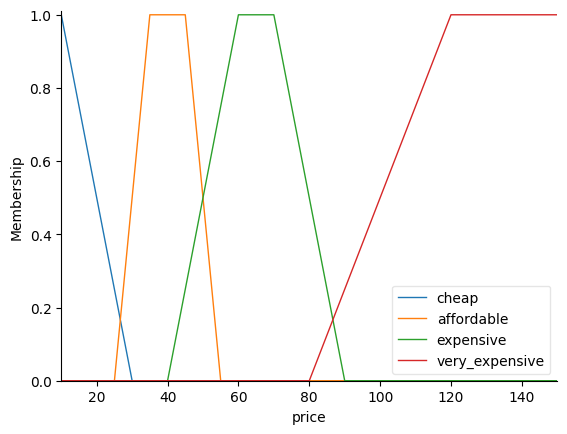

In [71]:
price = ctrl.Antecedent(np.arange(10, 151, 1), 'price')

price['cheap'] = fuzz.trimf(price.universe, [10, 10, 30])
price['affordable'] = fuzz.trapmf(price.universe, [25, 35, 45, 55])
price['expensive'] = fuzz.trapmf(price.universe, [40, 60, 70, 90])
price['very_expensive'] = fuzz.trapmf(price.universe, [80, 120, 150, 150])

price.view()


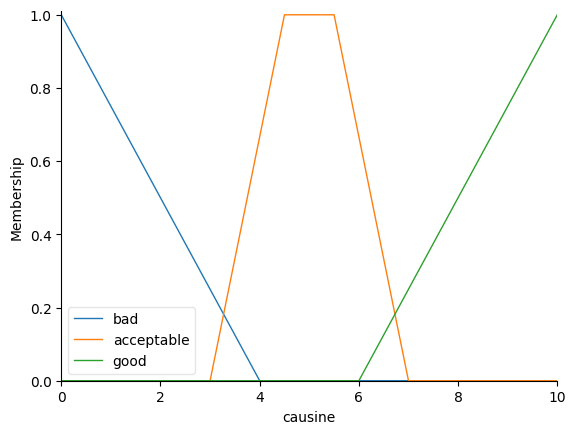

In [72]:
causine = ctrl.Antecedent(np.arange(0, 10.5, 0.5), 'causine')

causine['bad'] = fuzz.trimf(causine.universe, [0, 0, 4])
causine['acceptable'] = fuzz.trapmf(causine.universe, [3, 4.5, 5.5, 7])
causine['good'] = fuzz.trimf(causine.universe, [6, 10, 10])

causine.view()


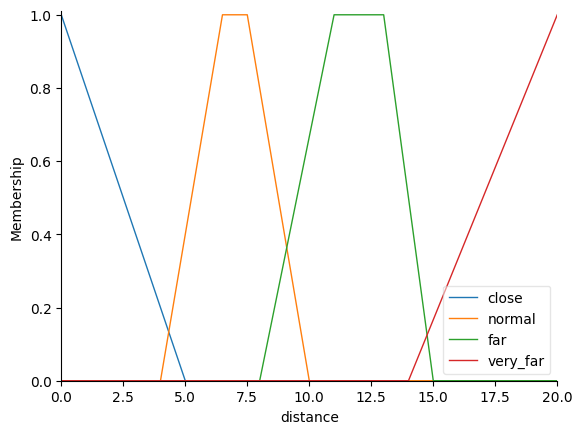

In [73]:
distance = ctrl.Antecedent(np.arange(0, 20.5, 0.5), 'distance')

distance['close'] = fuzz.trimf(distance.universe, [0, 0, 5])
distance['normal'] = fuzz.trapmf(distance.universe, [4, 6.5, 7.5, 10])
distance['far'] = fuzz.trapmf(distance.universe, [8, 11, 13, 15])
distance['very_far'] = fuzz.trimf(distance.universe, [14, 20, 20])

distance.view()


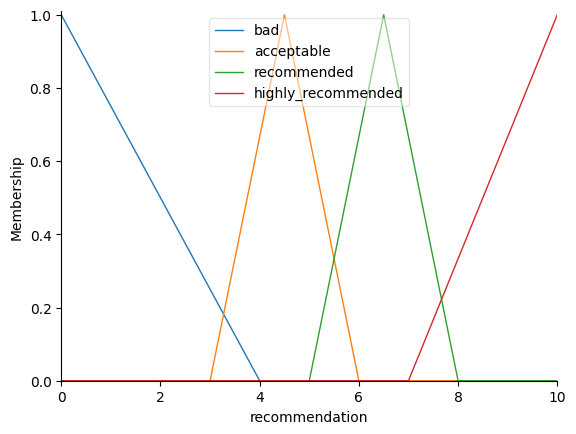

In [74]:
recommendation = ctrl.Consequent(np.arange(0, 10.5, 0.5), 'recommendation')

recommendation['bad'] = fuzz.trimf(recommendation.universe, [0, 0, 4])
recommendation['acceptable'] = fuzz.trimf(recommendation.universe, [3, 4.5, 6])
recommendation['recommended'] = fuzz.trimf(recommendation.universe, [5, 6.5, 8])
recommendation['highly_recommended'] = fuzz.trimf(recommendation.universe, [7, 10, 10])

recommendation.view()


In [75]:
import pandas as pd
import itertools
import os.path

prices = ['cheap','affordable','expensive','very_expensive'] 
cuisines = ['bad','acceptable','good']
distances = ['close','normal','far','very_far']
recommendations = ['bad','acceptable','recommended','highly_recommended']

filename = 'recommendations.csv'

if os.path.isfile(filename):
    df = pd.read_csv(filename)
else:
    df = pd.DataFrame(list(itertools.product(prices, cuisines, distances)), columns=['Price','Cuisine','Distance'])
df['Combination'] = df['Price'] + ' price, ' + df['Cuisine'] + ' cuisine, ' + df['Distance'] + ' distance'
df.shape

(64, 4)

In [76]:
df.to_csv(filename,index=False)

In [77]:
df.shape

(64, 4)

In [78]:
recommendation_ctrl = ctrl.ControlSystem([
   ctrl.Rule( #1
       price['cheap'] & 
       (causine['good']) &
       ~distance['very_far']

       , recommendation['highly_recommended']
   ),

   ctrl.Rule( #2
       price['cheap'] & 
       (causine['good']) &
       distance['very_far']

       , recommendation['recommended']
   ),

   ctrl.Rule( #3
       price['cheap'] & 
       (causine['acceptable']) &
       distance['close']

       , recommendation['recommended']
   )  , 

   ctrl.Rule( #4
       price['cheap'] & 
       (causine['acceptable']) &
       ~distance['close']

       , recommendation['acceptable']
   ) ,

   ctrl.Rule( #5 6 11 16
       (price['cheap'] & causine['bad']) |
       (~price['cheap'] & ~causine['good'] ) 
       , recommendation['bad']
   ), 


   ctrl.Rule( #7
       price['affordable'] & 
       (causine['acceptable']) &
       (distance['close'] | distance['normal'])

       , recommendation['acceptable']
   ),    

   ctrl.Rule( #8
       price['affordable'] & 
       (causine['acceptable']) &
       ~(distance['close'] | distance['normal'])

       , recommendation['bad']
   ),    

   ctrl.Rule( #9
       price['affordable'] & 
       (causine['good']) &
       (distance['close'] | distance['normal'])

       , recommendation['recommended']
   ),  

   ctrl.Rule( #10
       price['affordable'] & 
       (causine['good']) &
       (distance['close'] | distance['normal'])
       
       , recommendation['acceptable']
   ),  

    ctrl.Rule( #12
       price['expensive'] & 
       (causine['good']) &
       (distance['close'])
       
       , recommendation['recommended']
   ), 

    ctrl.Rule( #13
       price['expensive'] & 
       (causine['good']) &
       (distance['normal'])
       
       , recommendation['acceptable']
   ), 

    ctrl.Rule( #14
       price['expensive'] & 
       (causine['good']) &
       ~(distance['close'] | distance['normal'])
       
       , recommendation['bad']
   ) 
])

In [79]:
prices = ['cheap','affordable','expensive','very_expensive'] 
cuisines = ['bad','acceptable','good']
distances = ['close','normal','far','very_far']
recommendations = ['bad','acceptable','recommended','highly_recommended']

In [80]:
recommender = ctrl.ControlSystemSimulation(recommendation_ctrl)

In [81]:
recommender.input['price'] = 100
recommender.input['causine'] = 1
recommender.input['distance'] = 18


recommender.compute()


1.3333333333333335


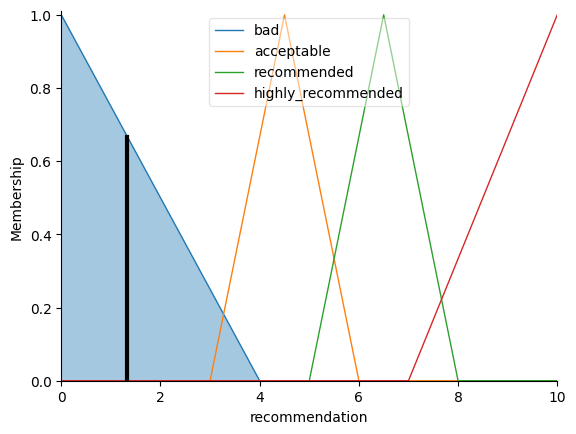

In [82]:
print(recommender.output['recommendation'])
recommendation.view(sim=recommender)
